In [1]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Question 1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [3]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [4]:
#for col in data.columns:
#  print(col, data[col].value_counts())

In [5]:
#data.describe()

data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [6]:
print("Categorical Columns: ", data.select_dtypes(exclude="number").columns)
print("Numeric Columns: ", data.select_dtypes(include="number").columns)

Categorical Columns:  Index(['Activity'], dtype='object')
Numeric Columns:  Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [7]:
enc = LabelEncoder()
data["Activity"] = enc.fit_transform(data["Activity"])

print("Categorical Columns: ", data.select_dtypes(exclude="number").columns)
print("Numeric Columns: ", data.select_dtypes(include="number").columns)

Categorical Columns:  Index([], dtype='object')
Numeric Columns:  Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)


## Question 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


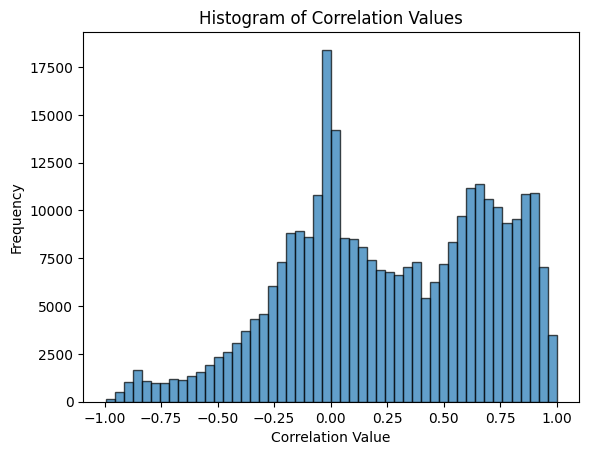

In [8]:
correlation_matrix = data.corr()


# Flatten the correlation matrix values and plot a histogram
correlation_values = correlation_matrix.values.flatten()
plt.hist(correlation_values, bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of Correlation Values")
plt.xlabel("Correlation Value")
plt.ylabel("Frequency")
plt.show()

In [9]:

columns = []
indexes = []
values = []

for index, row in data.corr()[data.corr() > 0.8].iterrows():
    for column, value in row.iteritems():
        if pd.notnull(value):
            columns.append(column)
            indexes.append(index)
            values.append(value)

# # Print the non-null values along with their indices and column names
# for index, column, value in non_null_values:
#     print(f"Index: {index}, Column: {column}, Value: {value}")
most_corelated_features = pd.DataFrame({"Feature_1": indexes, "Feature_2": columns, "Corelation_Value": values,"Absolute_Corelation":[abs(x) for x in values]}, index=list(range(0,(len(columns))))).sort_values('Corelation_Value', ascending=False)

<ipython-input-9-3023f1f67ead>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in row.iteritems():


In [10]:
most_corelated_features

,Feature_1,Feature_2,Corelation_Value,Absolute_Corelation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
13432,tBodyAccMag-sma(),tGravityAccMag-mean(),1.000000,1.000000
13423,tBodyAccMag-sma(),tBodyAccMag-mean(),1.000000,1.000000
13316,tBodyAccMag-min(),tGravityAccMag-min(),1.000000,1.000000
13312,tBodyAccMag-min(),tBodyAccMag-min(),1.000000,1.000000
...,...,...,...,...
21836,fBodyAcc-std()-Z,fBodyGyro-std()-X,0.800002,0.800002
13330,tBodyAccMag-min(),fBodyAcc-std()-X,0.800001,0.800001
21378,fBodyAcc-std()-X,tBodyAccMag-min(),0.800001,0.800001
21387,fBodyAcc-std()-X,tGravityAccMag-min(),0.800001,0.800001


## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = data.columns[:-1]
X = data[feature_cols]
y = data["Activity"]

ss = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

train_idx, test_idx = next(ss.split(X, y))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']


In [12]:
print(y_test.value_counts(normalize=True))

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64


In [13]:
print(y_train.value_counts(normalize=True))

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64


## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logreg = LogisticRegression()

param_grid = {
    "penalty": ["l1","l2"]
}
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


## Question 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [56]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
324 -0.034618  0.040846 -0.150026 -0.039791 -0.135314 -0.010721 -0.020667   
384 -0.015372  0.190746  0.174221  0.021072  0.067333 -0.139919 -0.006228   
50   0.317225  1.904829 -2.562046  0.248908  0.348187 -1.277040 -0.218909   
480  0.001270  0.223911  0.193147 -0.099861  0.226713  0.185363 -0.063037   
137 -0.011209 -0.006294  0.154818  0.048496 -0.191614  0.130580 -0.004326   
118  0.091168  0.926293 -1.012946  0.608355 -0.105162 -0.756243  0.109260   
156  0.158619 -1.055557  0.662775  0.586387 -0.450625 -1.521089  0.858268   
227 -0.054722 -0.117129 -0.253404  0.227713  0.048845 -0.230108  0.000000   
370  0.129000 -0.061671  0.174566  0.691987  0.150179 -0.121212  0.145041   
121 -0.077958 -0.606794  1.068187  0.511725  0.109273 -0.292087 -0.208639   

                                                             l2            \
            1         2         3         4         5         0         1   
324  0.000000  0.000000  0.000000  0.000000  0.000000 -0.054673  0.456340   
384  0.000000  0.000000  0.000000  0.000000 -0.027383 -0.047348  0.522641   
50   0.797377  0.000000  0.000000  0.000000 -4.645748  0.394311  3.453745   
480  0.108979  0.027165  0.000000  0.171709  0.211834 -0.018439  0.582460   
137  0.000000  0.000000  0.000000 -0.010302  0.185718 -0.030165 -0.382323   
118  1.440169 -1.571148  0.241520  0.000000 -1.350036  0.200698  1.997326   
156 -3.483275  2.246363  0.347352 -1.125803 -5.813218  0.342318 -4.072090   
227  0.000000  0.000000  0.000000  0.000000 -0.491761 -0.094657 -0.247958   
370 -0.008431  0.082262  1.099832  0.000000  0.000000  0.266889  0.010055   
121 -0.771636  4.865344  0.262524 -0.209801 -0.756770 -0.156115 -2.823005   

                                             
            2         3         4         5  
324 -0.171961  0.158334 -0.110696 -0.063751  
384  0.239646  0.264031 -0.056789 -0.528704  
50  -3.185952  1.048620  0.841507 -2.920119  
480  0.202132 -0.246495  0.343172  0.331362  
137  0.223700  0.055624 -0.423568  0.402570  
118 -1.180633  1.040901 -0.317713 -1.354938  
156  1.416069  1.044682 -0.860840 -3.487662  
227 -0.373033  0.784646 -0.029764 -0.225674  
370  0.171818  2.434744  0.062341 -0.176649  
121  1.884642  1.714836  0.118877 -0.738054

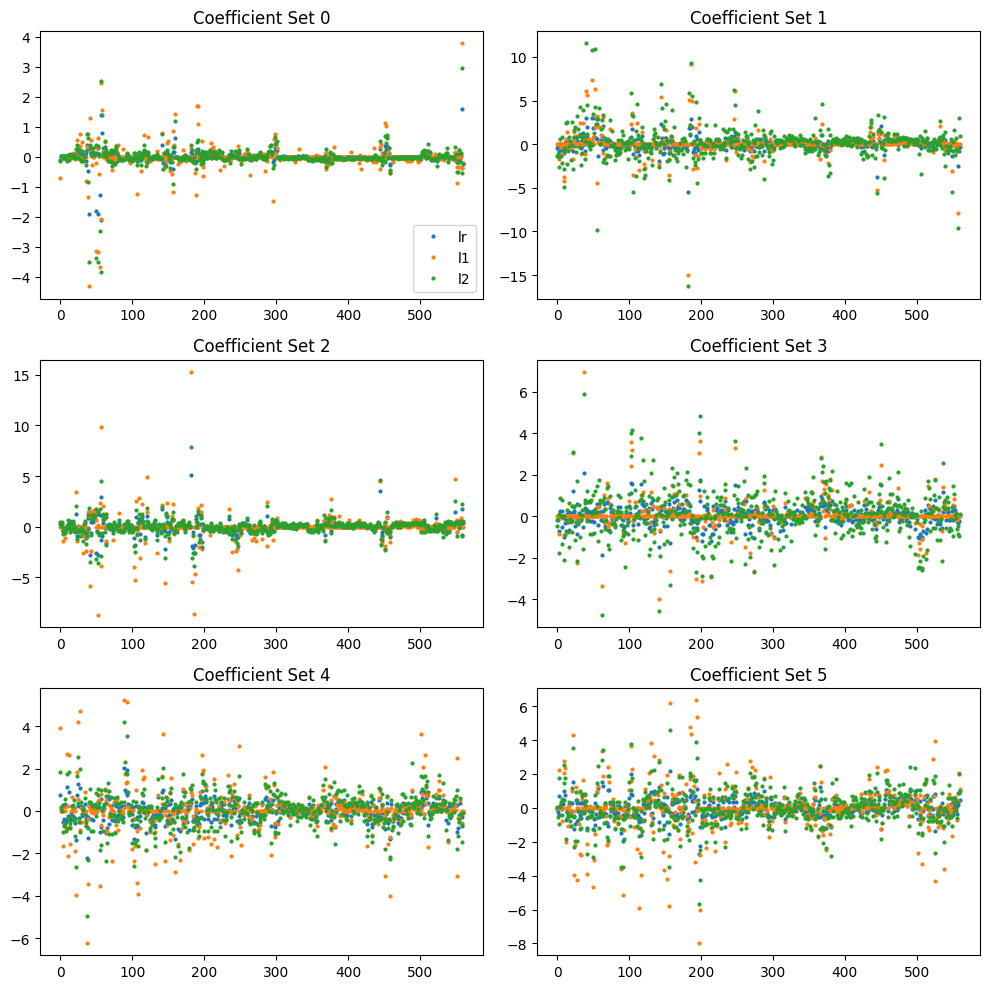

In [42]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [67]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()


,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [61]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998941,0.999757
1,0.988165,0.999417,0.999489
2,0.987592,0.995435,0.999657
3,0.981381,0.999191,0.994339
4,0.998277,0.999920,0.999997


## Question 7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.
*italicized text*

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming y_true and y_pred are your true labels and predicted labels respectively


accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
cm = {}

for lab,mod in zip(coeff_labels, coeff_models):
    accuracy_scores.append(pd.Series(accuracy_score(y_test, mod.predict(X_test)) , name="{}_accuracy".format(lab)))
    precision_scores.append(pd.Series(precision_score(y_test, mod.predict(X_test), average='weighted') , name="{}_precision".format(lab)))
    recall_scores.append(pd.Series(recall_score(y_test, mod.predict(X_test), average='weighted') , name="{}_recall".format(lab)))
    f1_scores.append(pd.Series(f1_score(y_test, mod.predict(X_test),average='weighted') , name="{}_f1_score".format(lab)))
    cm[lab] = confusion_matrix(y_test, mod.predict(X_test))




# # Calculate accuracy
# accuracy = accuracy_score(y_true, y_pred)

# # Calculate precision
# precision = precision_score(y_true, y_pred)

# # Calculate recall
# recall = recall_score(y_true, y_pred)

# # Calculate F1-score
# f1 = f1_score(y_true, y_pred)

# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)
# print("Confusion Matrix:\n", conf_matrix)

accuracy_scores = pd.concat(accuracy_scores, axis=1)
precision_scores = pd.concat(precision_scores, axis=1)
recall_scores = pd.concat(recall_scores, axis=1)
f1_scores = pd.concat(f1_scores, axis=1)


combined_metrics = pd.concat([accuracy_scores, precision_scores,recall_scores,f1_scores], axis=1)  # Join horizontally (columns)
combined_metrics.head()



# cm

,lr_accuracy,l1_accuracy,l2_accuracy,lr_precision,l1_precision,l2_precision,lr_recall,l1_recall,l2_recall,lr_f1_score,l1_f1_score,l2_f1_score
0,0.984142,0.983495,0.983819,0.984144,0.983514,0.983824,0.984142,0.983495,0.983819,0.984143,0.983492,0.983819


## Question 8

*   Display or plot the confusion matrix for each model.


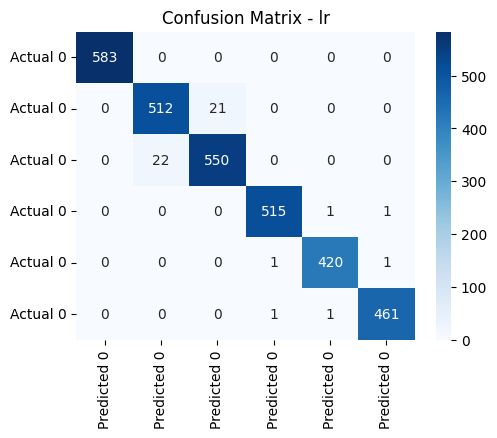

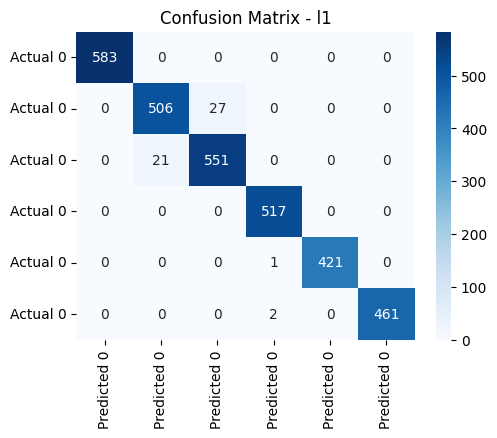

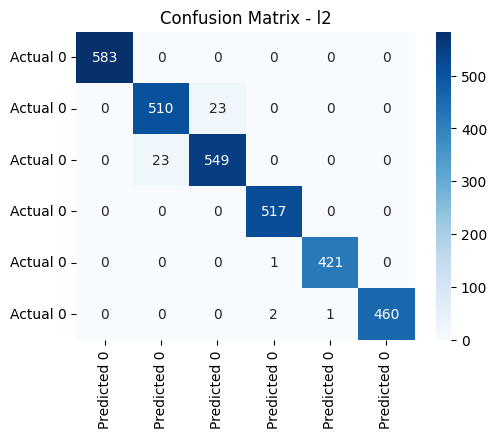

In [101]:
for lab,mod in zip(coeff_labels, coeff_models):
  conf_matrix_lr1 = confusion_matrix(y_test, mod.predict(X_test))
  conf_matrix_lr1_df = pd.DataFrame(conf_matrix_lr1, columns=['Predicted 0'] * len(conf_matrix_lr1), index=['Actual 0'] * len(conf_matrix_lr1))

  conf_matrix_lr1_df
  # Plot confusion matrices using seaborn heatmap
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  sns.heatmap(conf_matrix_lr1_df, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix - {}".format(lab))